<a href="https://colab.research.google.com/github/marianatiele/AprendizadoMaquina_Projetos/blob/main/10_Classificacao_empresas_investir_longo_prazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Empresas para Investir ao longo prazo.
Classificação e agrupamento de empresas usando machine learning
Colab original: https://colab.research.google.com/drive/1d4-nTueHYTYDMjJW4Z2Lyxe2eSRoUgsd?usp=sharing#scrollTo=iuMuhblzoWlG

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Classificação de empresas com machine learning
Esta base de dados foi criada com as informações disponibizadas no site www.bastter.com. Para o acesso de tais informações, foi necessário comprar uma conta
Empresas com indisponibilidade de informações ficaram com seus respectivos campos vazios
Atributo situação (classe): este atributo recebeu valores que correspondem a boa, média ou ruim. Estas posições foram retiradas do site do www.tororadar.com e do aplicativo Dinheiro do Windows 10

## Carregamento e pré-processamento da base de dados
Base dados: [BD Completo](https://docs.google.com/spreadsheets/d/1sQeLD0v-mzZe-NmwT2L00b4lxDtw3Fj2/edit#gid=1733725134)

In [10]:
dados = pd.read_excel('/content/BD Completo.xlsx')
dados.head(3)

,Situação,Empresa,Segmento,Valor de M.,EV,Majoritar.,Pes. Fisicas,Categoria,LPA,LPA desconctado,...,FCO,FCI,FCF,FCT,FCL,FCI/LL,CAPEX,FCL CAPEX,CAPEX/LL,CAPEX/FCO
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,"Brasiliana Participaçoes (98,26%)",15969.0,alerta,0.57,0.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,NaN,"Aes Holdings Brasil ltda. (61,57%)",18681.0,dividendos,0.18,0.18,...,836.0,-126.0,-728.0,-18.0,710.0,0.68,-139.0,696.0,26.0,17.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,contour global do brasil participações ltda (9...,1898.0,alerta,0.16,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dados.shape

(377, 70)

<Axes: >

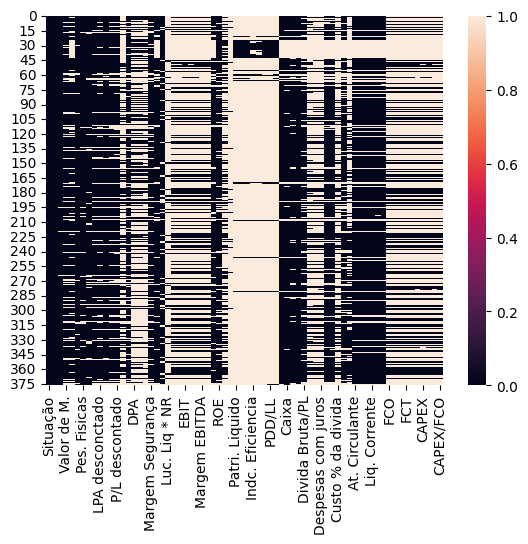

In [11]:
# os lugares claros indica valores ausentes
sns.heatmap(dados.isnull())

In [33]:
# :mostrar toda a base de dadso
pd.set_option('display.max_rows', None)
dados.isnull().sum()

Situação             0
Empresa              0
Segmento             3
Valor de M.         58
EV                  92
Pes. Fisicas        19
Categoria           29
LPA                 41
LPA desconctado     60
VPA                 38
P/L                 61
P/L descontado      66
P/VPA               64
Margem Segurança    56
Rec. Liquida        51
Luc. Liquido        52
Margem Liquida      59
ROE                 49
Patri. Liquido.1    33
Caixa               41
Divida bruta        54
Divida Liquida      36
Divida Bruta/PL     81
EF                  66
ECP                 67
EM                  83
At. Circulante      60
Pas. Circulante     60
Caixa.1             60
Liq. Corrente       60
Liq. Imediata       61
Capital de giro     61
dtype: int64

In [27]:
dados.isnull().sum() > 200

Situação       False
Empresa        False
Segmento       False
Valor de M.    False
EV             False
               ...  
FCI/LL          True
CAPEX           True
FCL CAPEX       True
CAPEX/LL        True
CAPEX/FCO       True
Length: 70, dtype: bool

In [29]:
# apagando nulos
dados.drop(labels = ['EV/EBITDA', 'DPA', 'Dividend Yield', 'Payout', 'Luc. Liq * NR',
                      'Resultado Bruto', 'Margem Bruta', 'EBIT', 'D&A', 'EBITDA',
                      'Margem EBITDA', 'Res. Financeiro', 'ROA', 'SSS', 'RIF',
                      'Margem Bancaria', 'Indc. Eficiencia', 'Indc. Basileia', 'PDD',
                      'PDD/LL', 'Equity Multi.', 'Div Liquida/EBITDA', 'Indice de Cobertura',
                      'Patri. Liquido', 'Despesas com juros', 'Custo % da divida', 'IPL', 'FCO', 'FCI',
                      'FCF', 'FCT', 'FCL', 'FCI/LL', 'CAPEX', 'FCL CAPEX', 'CAPEX/LL', 'CAPEX/FCO',
                      'Majoritar.'],
             axis = 1, inplace = True)

In [30]:
dados.shape

(377, 32)

In [32]:
pd.set_option('display.max_rows', 10)
dados

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.0,alerta,0.57,0.56,36.03,24.71,24.71,0.38,-0.53,9895.0,555.0,0.0648,20.66,2012.0,3501.000,2721.0,1567.00,0.86,49.00,11.0,3.94,4610.0,4508.0,545.0,1.02,0.12,102.0
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,NaN,18681.0,dividendos,0.18,0.18,0.80,14.92,14.92,3.39,22.00,2143.0,703.0,34.6900,37.00,1812.0,537.000,2997.0,2459.00,1.72,58.00,15.0,2.40,776.0,828.0,583.0,0.94,0.70,-52.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.0,alerta,0.16,0.15,2.07,31.55,31.55,2.42,-63.00,30.0,13.0,38.1500,25.00,48.0,8.000,0.0,-8.00,NaN,NaN,NaN,1.24,12.0,8.0,9.0,1.50,1.13,4.0
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.0,alerta,0.21,0.20,1.23,21.69,21.69,3.61,46.00,31.0,17.0,56.0000,22.00,78.0,35.000,3.0,-31.00,0.04,5.25,23.0,1.15,74.0,7.0,42.0,10.57,6.00,67.0
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.0,crescimento moderado,0.60,0.60,10.42,5.65,5.65,0.32,116.00,10.0,45.0,157.4500,6.00,721.0,580.000,140.0,-440.75,0.25,NaN,NaN,1.01,6.0,6.0,3.0,1.00,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ruim,whirlpool s.a whrl,eletrodomésticos,5.034333e+09,4.615333e+09,NaN,dividendos,0.21,0.21,1.69,15.64,15.64,1.94,26.00,8447.0,NaN,6.1800,24.00,2130.0,627.000,205.0,-421.00,0.09,10.00,47.0,2.63,4275.0,3598.0,756.0,1.19,0.21,677.0
373,boa,wilson sons ltd wson,serviços de apoio e armazenagem,NaN,NaN,176.0,alerta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1261.0,109.0,9.3600,11.00,1060.0,331.000,810.0,478.00,0.74,42.00,9.0,2.13,936.0,492.0,512.0,1.90,1.04,444.0
374,ruim,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.0,alerta,-0.52,-0.52,11.61,-7.35,-7.35,0.33,-271.00,777.0,21.0,2.2100,5.00,452.0,135.000,0.0,-135.00,NaN,NaN,NaN,1.18,179.0,59.0,46.0,3.03,0.78,120.0
375,ruim,zain participações s.a opzi,outros,NaN,NaN,2.0,alerta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.0,NaN,NaN,4.0,2.000,NaN,-2.00,NaN,NaN,NaN,NaN,4.0,1.0,1.0,4.00,1.00,3.0


In [34]:
pd.set_option('display.max_rows', None)
dados.isnull().sum()

Situação             0
Empresa              0
Segmento             3
Valor de M.         58
EV                  92
Pes. Fisicas        19
Categoria           29
LPA                 41
LPA desconctado     60
VPA                 38
P/L                 61
P/L descontado      66
P/VPA               64
Margem Segurança    56
Rec. Liquida        51
Luc. Liquido        52
Margem Liquida      59
ROE                 49
Patri. Liquido.1    33
Caixa               41
Divida bruta        54
Divida Liquida      36
Divida Bruta/PL     81
EF                  66
ECP                 67
EM                  83
At. Circulante      60
Pas. Circulante     60
Caixa.1             60
Liq. Corrente       60
Liq. Imediata       61
Capital de giro     61
dtype: int64

In [ ]:
# subistituir os dados faltantes pela média, valores numéricos
dados.fillna(dados.mean(),inplace=True)

In [41]:
pd.set_option('display.max_rows', None)
dados.isnull().sum()

Situação             0
Empresa              0
Segmento             3
Valor de M.          0
EV                   0
Pes. Fisicas         0
Categoria           29
LPA                  0
LPA desconctado      0
VPA                  0
P/L                  0
P/L descontado       0
P/VPA                0
Margem Segurança     0
Rec. Liquida         0
Luc. Liquido         0
Margem Liquida       0
ROE                  0
Patri. Liquido.1     0
Caixa                0
Divida bruta         0
Divida Liquida       0
Divida Bruta/PL      0
EF                   0
ECP                  0
EM                   0
At. Circulante       0
Pas. Circulante      0
Caixa.1              0
Liq. Corrente        0
Liq. Imediata        0
Capital de giro      0
dtype: int64

In [43]:
# Apagando os dados faltantes  em categóricos
dados.dropna(inplace=True)
dados.shape

(347, 32)

In [44]:
dados.isnull().sum()

Situação            0
Empresa             0
Segmento            0
Valor de M.         0
EV                  0
Pes. Fisicas        0
Categoria           0
LPA                 0
LPA desconctado     0
VPA                 0
P/L                 0
P/L descontado      0
P/VPA               0
Margem Segurança    0
Rec. Liquida        0
Luc. Liquido        0
Margem Liquida      0
ROE                 0
Patri. Liquido.1    0
Caixa               0
Divida bruta        0
Divida Liquida      0
Divida Bruta/PL     0
EF                  0
ECP                 0
EM                  0
At. Circulante      0
Pas. Circulante     0
Caixa.1             0
Liq. Corrente       0
Liq. Imediata       0
Capital de giro     0
dtype: int64

In [45]:
# dados apagados
(20 / 377) *100

5.305039787798409

##Visualização e Exploração